In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Chỉ định mã hóa chính xác (ví dụ: 'latin1') khi đọc tệp CSV
all_data_cleaned = pd.read_csv('data_final.csv')

# Hiển thị DataFrame
all_data_cleaned

,LAT,LON,DATE,YEAR,MONTH,DAY,QV2M,RH2M,PRECTOTCORR,PS,...,WS2M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR_TODAY,PRECTOTCORR_1_DAY_AFTER
0,18.25,103.25,2000-01-01,2000,1,1,12.41,84.03,0.00,97.21,...,0.89,19.93,16.89,18.41,19.68,11.92,26.69,14.77,0.0,0.0
1,18.25,103.75,2000-01-01,2000,1,1,12.24,84.41,0.00,97.93,...,0.86,19.74,16.80,18.27,19.59,11.78,26.36,14.58,0.0,0.0
2,18.25,104.25,2000-01-01,2000,1,1,11.58,84.33,0.00,96.36,...,0.49,18.64,15.65,17.14,18.60,11.15,25.10,13.95,0.0,0.0
3,18.25,104.75,2000-01-01,2000,1,1,11.16,85.76,0.00,94.71,...,0.33,17.47,14.82,16.14,17.42,10.06,23.37,13.32,0.0,0.0
4,18.25,105.25,2000-01-01,2000,1,1,11.33,88.11,0.00,95.31,...,0.56,17.28,15.15,16.21,17.07,8.77,22.52,13.75,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345955,20.25,104.75,2023-10-21,2023,10,21,10.82,79.52,0.12,94.18,...,0.42,18.00,14.27,16.13,17.61,7.06,21.74,14.68,1.0,1.0
345956,20.25,105.25,2023-10-21,2023,10,21,11.53,80.28,0.24,97.66,...,1.69,19.35,15.78,17.56,19.13,6.25,22.45,16.19,1.0,1.0
345957,20.25,105.75,2023-10-21,2023,10,21,12.68,81.65,0.50,100.77,...,3.63,21.10,17.77,19.43,21.38,5.73,23.83,18.11,1.0,1.0
345958,20.25,106.25,2023-10-21,2023,10,21,13.49,81.50,1.25,101.68,...,5.00,22.24,18.92,20.58,23.49,4.40,24.34,19.94,1.0,1.0


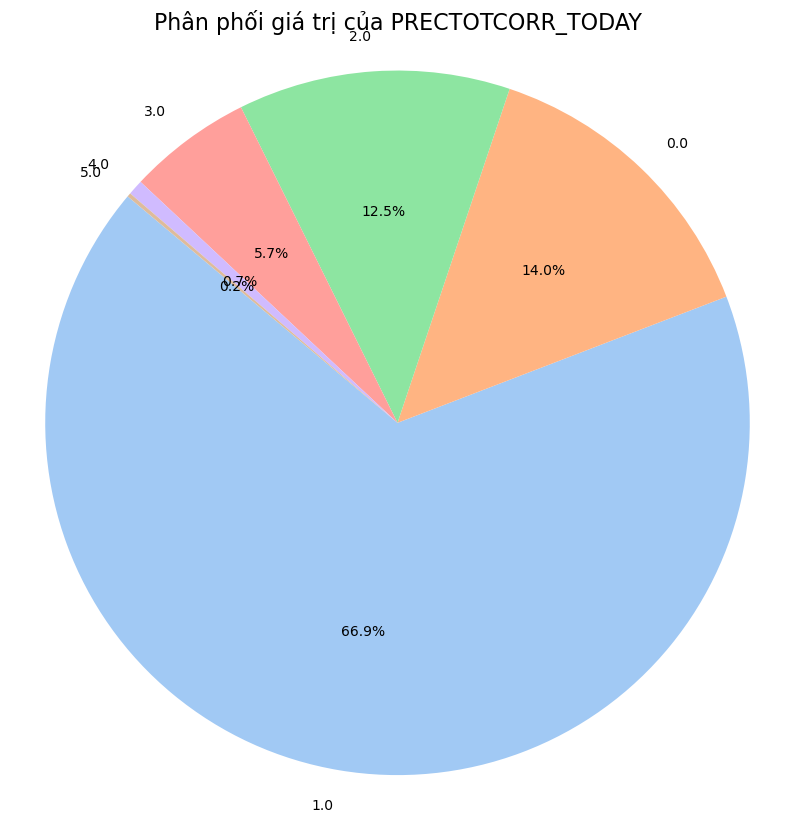

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Tính phần trăm cho mỗi giá trị trong cột "PRECTOTCORR_TODAY"
percentages = all_data_cleaned["PRECTOTCORR_TODAY"].value_counts(normalize=True) * 100

# Tạo biểu đồ tròn với thay đổi
plt.figure(figsize=(10, 10))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Phân phối giá trị của PRECTOTCORR_TODAY', fontsize=16)
plt.axis('equal')  # Đảm bảo biểu đồ tròn không bị méo
plt.show()


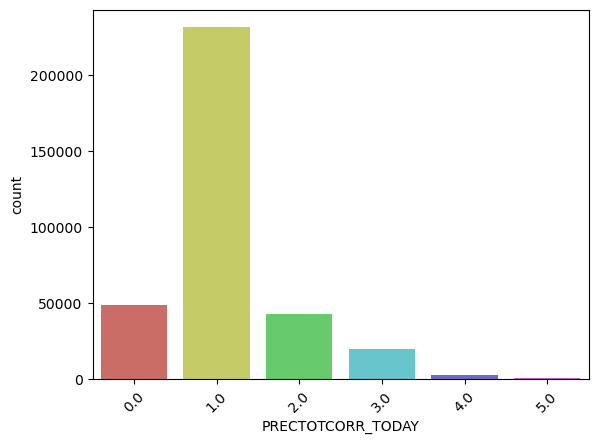

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Tạo count plot với xoay nhãn 45 độ
sns.countplot(x="PRECTOTCORR_TODAY", data=all_data_cleaned, palette="hls")
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.show()


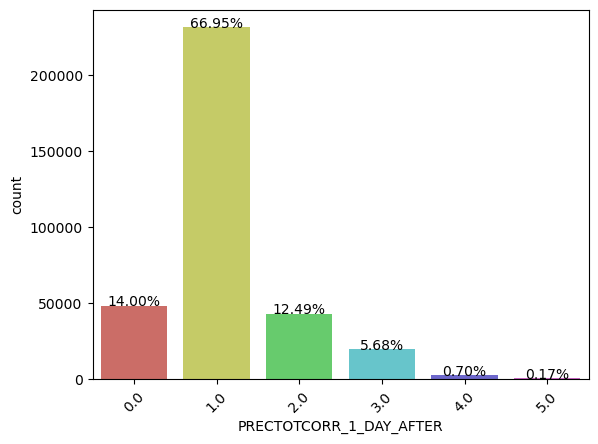

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Tạo count plot với xoay nhãn 45 độ
ax = sns.countplot(x="PRECTOTCORR_1_DAY_AFTER", data=all_data_cleaned, palette="hls")
plt.xticks(rotation=45)

# Tính phần trăm cho mỗi cột
total = float(len(all_data_cleaned["PRECTOTCORR_1_DAY_AFTER"]))
for p in ax.patches:
    height = p.get_height()
    percentage = (height/total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

# Hiển thị biểu đồ
plt.show()


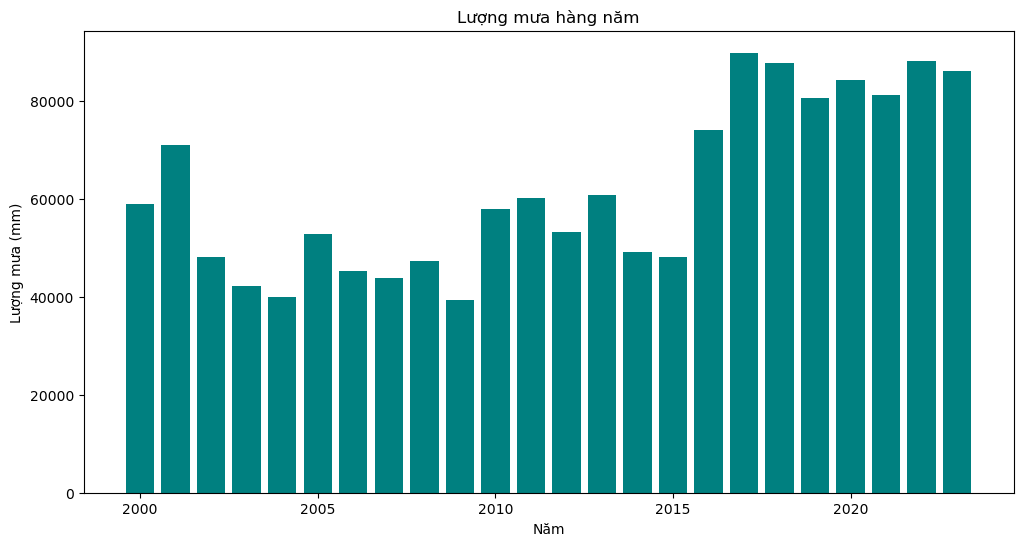

In [6]:
# Group dữ liệu theo năm và tính tổng lượng mưa cho mỗi năm
rainfall_by_year = all_data_cleaned.groupby('YEAR')['PRECTOTCORR'].sum()

# Chọn màu cho thanh bar
bar_color = 'skyblue'

# Tạo biểu đồ
plt.figure(figsize=(12, 6))
plt.bar(rainfall_by_year.index, rainfall_by_year, color='teal')
plt.xlabel('Năm')
plt.ylabel('Lượng mưa (mm)')
plt.title('Lượng mưa hàng năm')
plt.show()


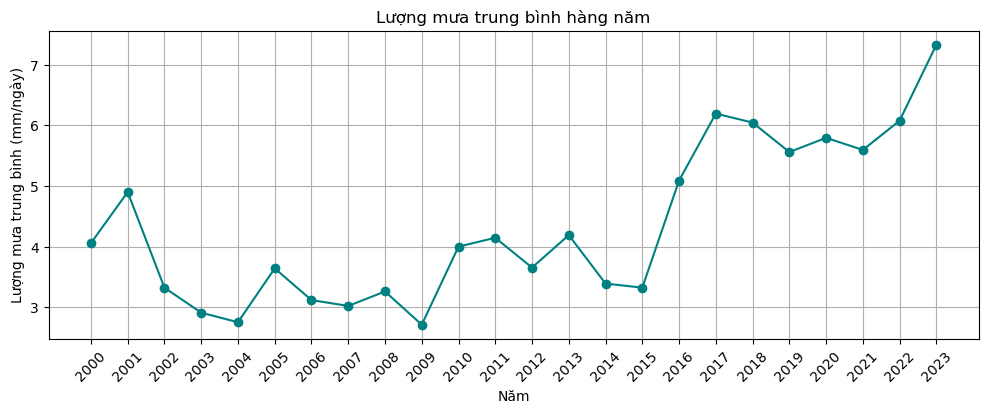

In [7]:
# Group dữ liệu theo năm và tính tổng lượng mưa cho mỗi năm
rainfall_by_year = all_data_cleaned.groupby('YEAR')['PRECTOTCORR'].sum()

# Group dữ liệu theo năm và tính lượng ngày quan sát được mưa
observed_days_by_year = all_data_cleaned.groupby('YEAR')['PRECTOTCORR'].count()

# Tính lượng mưa trung bình cho mỗi năm
average_rainfall_by_year = rainfall_by_year / observed_days_by_year

# Tạo biểu đồ đường
plt.figure(figsize=(12, 4))
plt.plot(average_rainfall_by_year.index, average_rainfall_by_year, marker='o', linestyle='-', color='teal')
plt.xlabel('Năm')
plt.ylabel('Lượng mưa trung bình (mm/ngày)')
plt.title('Lượng mưa trung bình hàng năm')
plt.grid(True)
# Sử dụng tất cả các năm trên trục x
plt.xticks(average_rainfall_by_year.index, rotation=45)
# Hiển thị biểu đồ
plt.show()


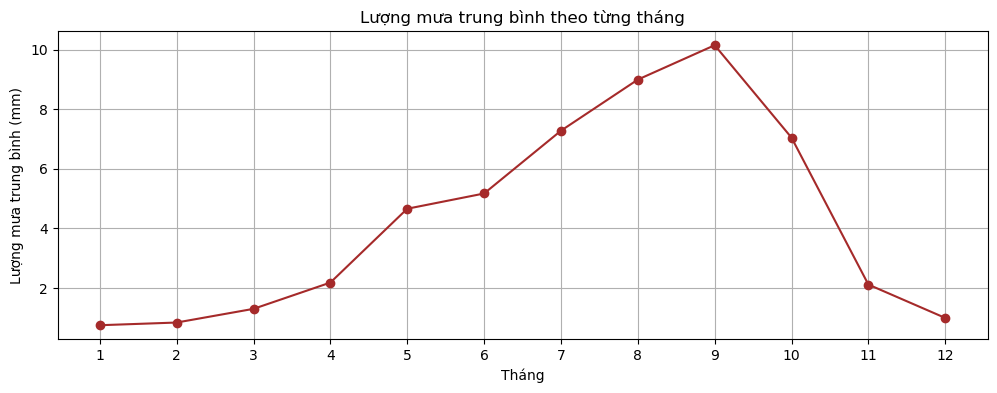

In [8]:
# Group dữ liệu theo tháng và tính lượng mưa trung bình cho từng tháng
rainfall_by_month = all_data_cleaned.groupby('MONTH')['PRECTOTCORR'].mean()

# Tạo biểu đồ đường
plt.figure(figsize=(12, 4))
plt.plot(rainfall_by_month.index, rainfall_by_month, marker='o', linestyle='-',color = 'brown')
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa trung bình (mm)')
plt.title('Lượng mưa trung bình theo từng tháng')
plt.grid(True)
# Sử dụng tất cả các năm trên trục x
plt.xticks(rainfall_by_month.index)
# Hiển thị biểu đồ
plt.show()

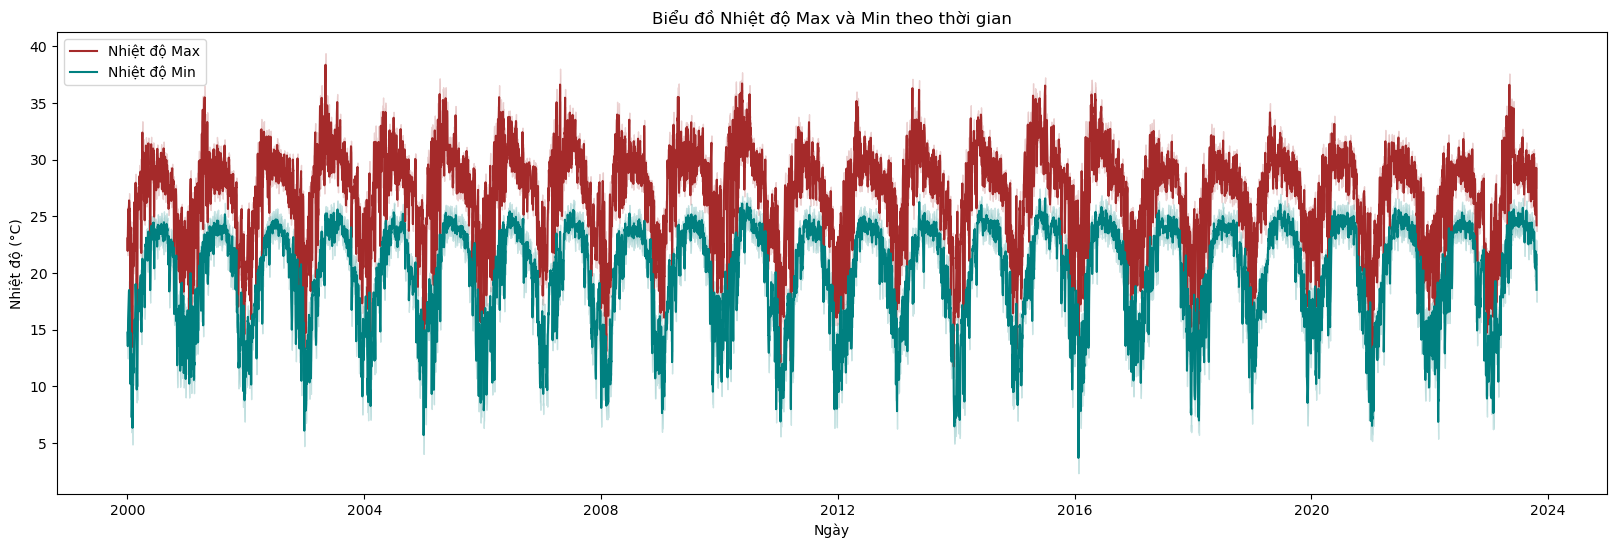

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Chuyển đổi cột 'DATE' sang định dạng datetime
all_data_cleaned['DATE'] = pd.to_datetime(all_data_cleaned['DATE'])

# Tạo biểu đồ đường cho T2M_MAX và T2M_MIN
plt.figure(figsize=(20, 6))
sns.lineplot(x='DATE', y='T2M_MAX', data=all_data_cleaned, label='Nhiệt độ Max', color='brown')
sns.lineplot(x='DATE', y='T2M_MIN', data=all_data_cleaned, label='Nhiệt độ Min', color='teal')

plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ (°C)')
plt.title('Biểu đồ Nhiệt độ Max và Min theo thời gian')
plt.legend()
plt.show()


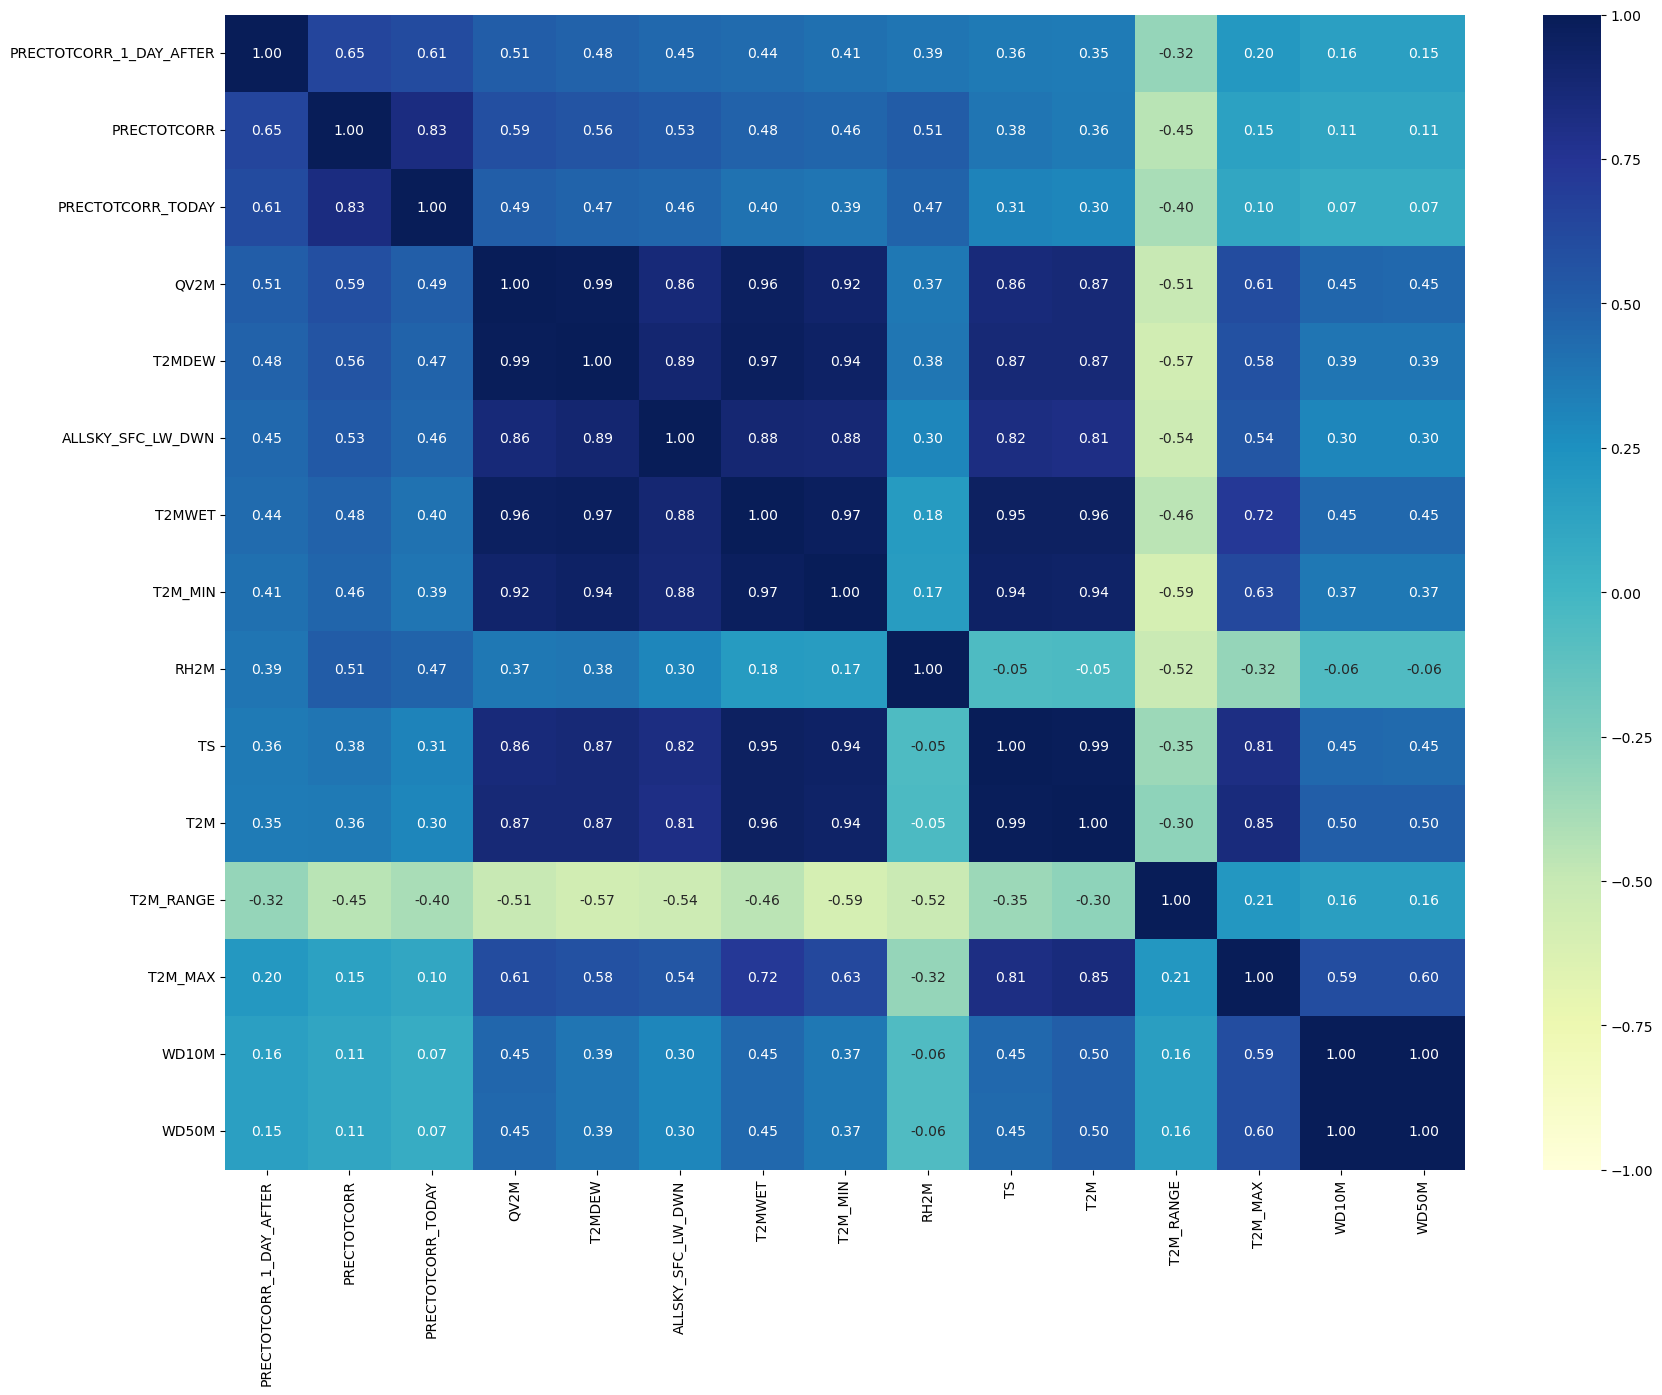

In [11]:
# Chọn số lượng biến bạn muốn
top_n = 15
# Tính ma trận tương quan cho toàn bộ DataFrame
correlation_matrix = all_data_cleaned.corr(method='spearman')
# Tính tương quan giữa biến mục tiêu và tất cả các biến khác
correlation_with_target = correlation_matrix['PRECTOTCORR_1_DAY_AFTER'].abs()

# Sắp xếp giảm dần và chọn ra top_n biến
top_correlated_features = correlation_with_target.sort_values(ascending=False).head(top_n).index

# Lấy ma trận tương quan của top_n biến
top_correlation_matrix = all_data_cleaned[top_correlated_features].corr(method='spearman')

# Đặt kích thước của biểu đồ
plt.figure(figsize=(20, 15))

# Tạo biểu đồ heatmap với bảng màu 'viridis' và độ sáng giảm
sns.heatmap(top_correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", vmin=-1, vmax=1)

# Hiển thị biểu đồ
plt.show()


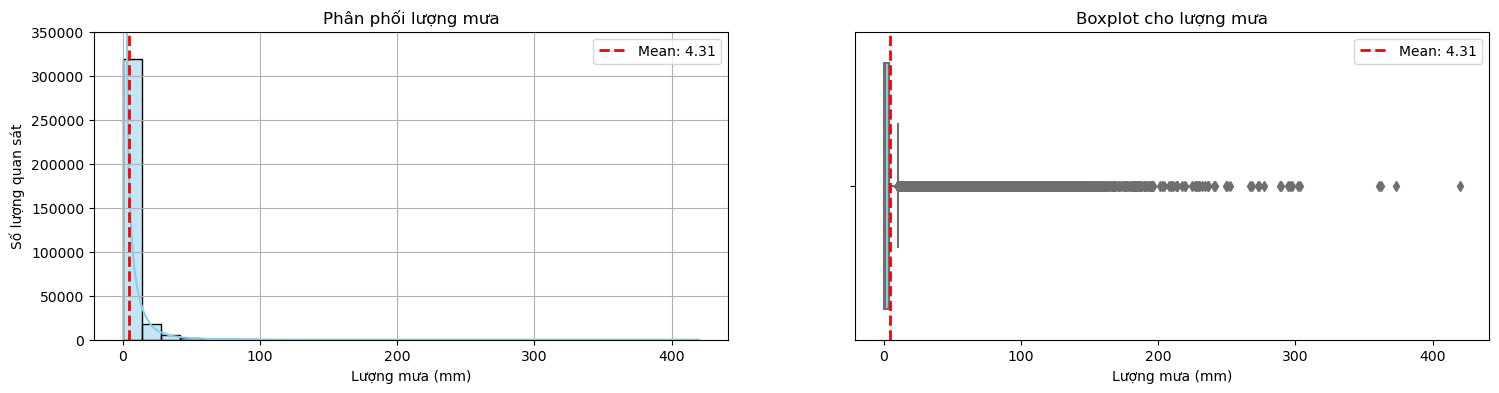

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram và boxplot cho biến 'PRECTOTCORR'
plt.figure(figsize=(18, 4))

# Biểu đồ histogram
plt.subplot(1, 2, 1)
sns.histplot(all_data_cleaned['PRECTOTCORR'], bins=30, kde=True, color='skyblue')
plt.xlabel('Lượng mưa (mm)')
plt.ylabel('Số lượng quan sát')
plt.title('Phân phối lượng mưa')
plt.grid(True)

# Đường mean
mean_value_rain = all_data_cleaned['PRECTOTCORR'].mean()
plt.axvline(mean_value_rain, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_rain:.2f}')
plt.legend()

# Giới hạn giá trị trục y
plt.ylim(top=350000)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=all_data_cleaned['PRECTOTCORR'], color='skyblue')
plt.xlabel('Lượng mưa (mm)')
plt.title('Boxplot cho lượng mưa')

# Đường mean
plt.axvline(mean_value_rain, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value_rain:.2f}')
plt.legend()

plt.show()


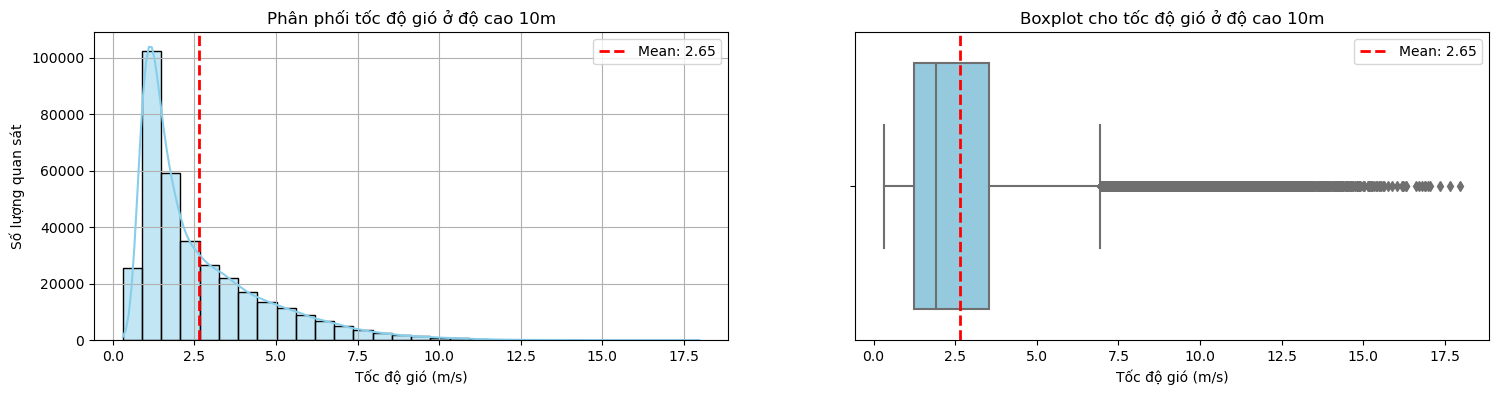

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram và boxplot cho biến 'WS2M'
plt.figure(figsize=(18, 4))

# Biểu đồ histogram
plt.subplot(1, 2, 1)
sns.histplot(all_data_cleaned['WS10M'], bins=30, kde=True, color='skyblue')
plt.xlabel('Tốc độ gió (m/s)')
plt.ylabel('Số lượng quan sát')
plt.title('Phân phối tốc độ gió ở độ cao 10m')
plt.grid(True)

# Đường mean
mean_value = all_data_cleaned['WS10M'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=all_data_cleaned['WS10M'], color='skyblue')
plt.xlabel('Tốc độ gió (m/s)')
plt.title('Boxplot cho tốc độ gió ở độ cao 10m')

# Đường mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

plt.show()


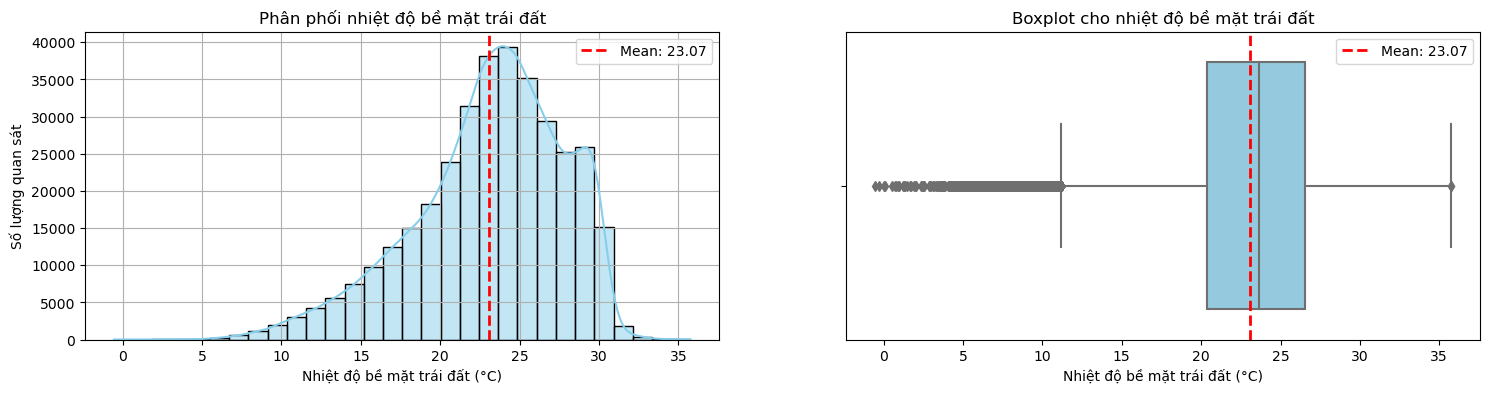

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram và đường phân phối cho biến 'TS'
plt.figure(figsize=(18, 4))

# Biểu đồ histogram
plt.subplot(1, 2, 1)
sns.histplot(all_data_cleaned['TS'], bins=30, kde=True, color='skyblue')
plt.xlabel('Nhiệt độ bề mặt trái đất (°C)')
plt.ylabel('Số lượng quan sát')
plt.title('Phân phối nhiệt độ bề mặt trái đất')
plt.grid(True)

# Đường trung bình
mean_temperature = all_data_cleaned['TS'].mean()
plt.axvline(mean_temperature, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_temperature:.2f}')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=all_data_cleaned['TS'], color='skyblue')
plt.xlabel('Nhiệt độ bề mặt trái đất (°C)')
plt.title('Boxplot cho nhiệt độ bề mặt trái đất')

# Đường trung bình
plt.axvline(mean_temperature, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_temperature:.2f}')
plt.legend()

plt.show()


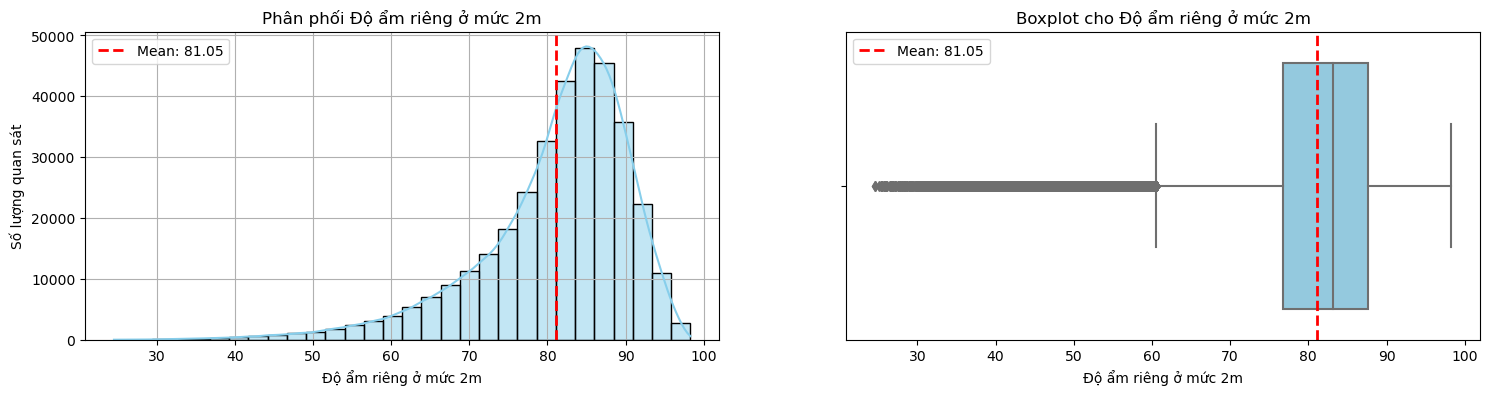

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram và boxplot cho biến 'RH2M'
plt.figure(figsize=(18, 4))

# Biểu đồ histogram
plt.subplot(1, 2, 1)
sns.histplot(all_data_cleaned['RH2M'], bins=30, kde=True, color='skyblue')
plt.xlabel('Độ ẩm riêng ở mức 2m')
plt.ylabel('Số lượng quan sát')
plt.title('Phân phối Độ ẩm riêng ở mức 2m')
plt.grid(True)

# Đường mean
mean_value = all_data_cleaned['RH2M'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=all_data_cleaned['RH2M'], color='skyblue')
plt.xlabel('Độ ẩm riêng ở mức 2m')
plt.title('Boxplot cho Độ ẩm riêng ở mức 2m')

# Đường mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

plt.show()


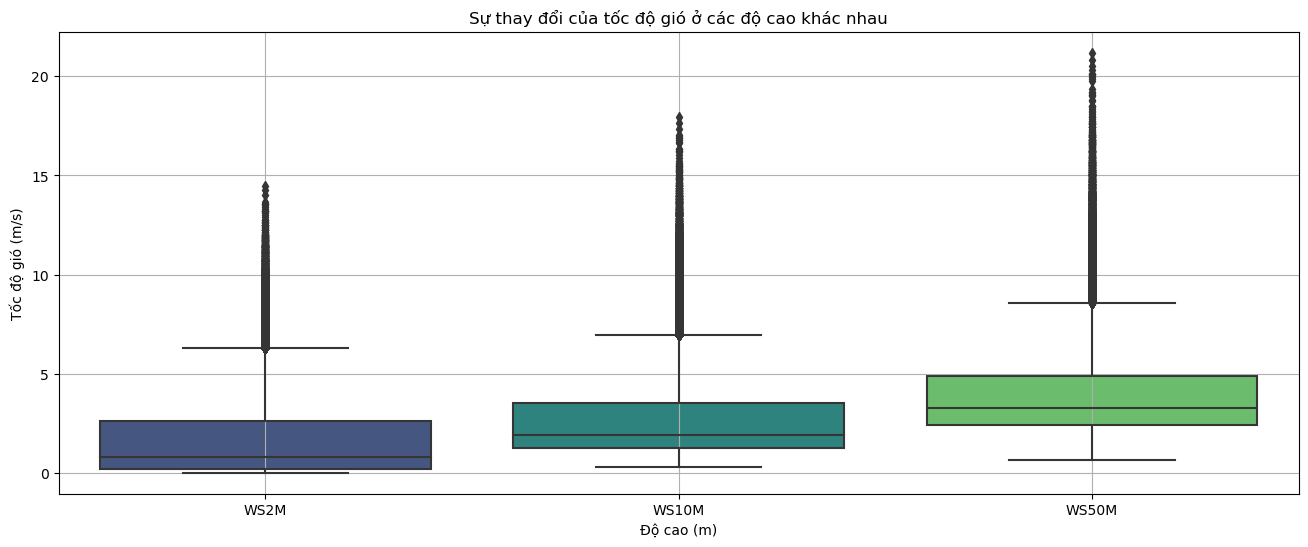

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame mới cho việc vẽ boxplot
wind_speed_data = all_data_cleaned[['WS2M', 'WS10M', 'WS50M']]

# Vẽ boxplot cho tốc độ gió ở các độ cao khác nhau
plt.figure(figsize=(16, 6))
sns.boxplot(data=wind_speed_data, palette='viridis')

plt.xlabel('Độ cao (m)')
plt.ylabel('Tốc độ gió (m/s)')
plt.title('Sự thay đổi của tốc độ gió ở các độ cao khác nhau')

plt.grid(True)
plt.show()


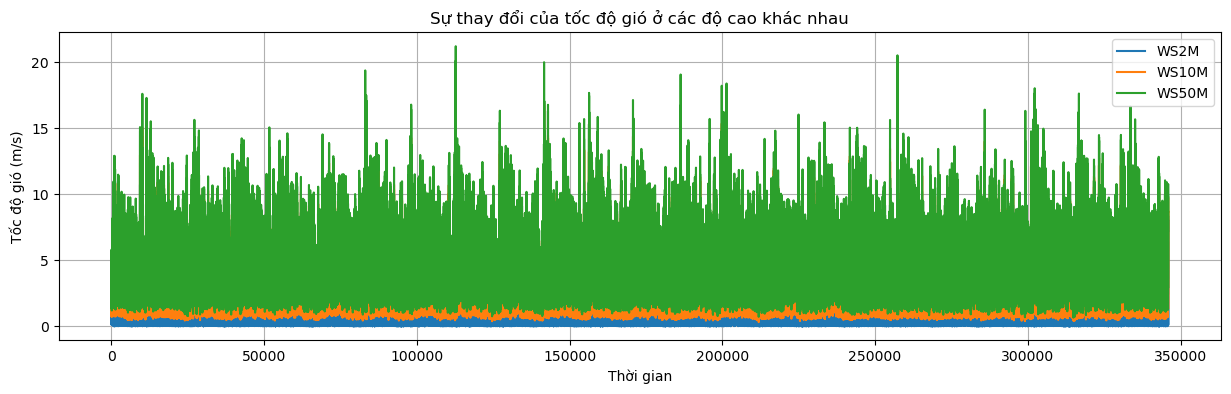

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame mới cho việc vẽ biểu đồ đường
wind_speed_data = all_data_cleaned[['WS2M', 'WS10M', 'WS50M']]

# Vẽ biểu đồ đường cho tốc độ gió ở các độ cao khác nhau
plt.figure(figsize=(15, 4))
sns.lineplot(data=wind_speed_data, dashes=False)

plt.xlabel('Thời gian')
plt.ylabel('Tốc độ gió (m/s)')
plt.title('Sự thay đổi của tốc độ gió ở các độ cao khác nhau')

plt.grid(True)
plt.show()


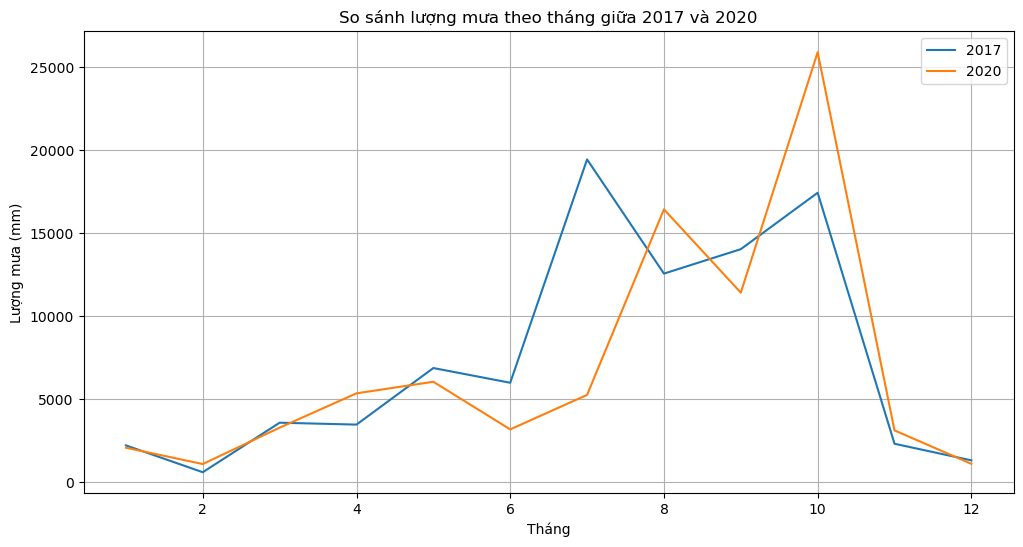

In [ ]:
# Tạo bộ dữ liệu riêng cho năm 2017 và 2020
data_2017 = all_data_cleaned[all_data_cleaned['YEAR'] == 2017]
data_2020 = all_data_cleaned[all_data_cleaned['YEAR'] == 2020]

# Tính tổng lượng mưa theo từng tháng cho cả hai năm
rainfall_2017 = data_2017.groupby('MONTH')['PRECTOTCORR'].sum()
rainfall_2020 = data_2020.groupby('MONTH')['PRECTOTCORR'].sum()

# Tạo biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(rainfall_2017.index, rainfall_2017, label='2017')
plt.plot(rainfall_2020.index, rainfall_2020, label='2020')
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa (mm)')
plt.title('So sánh lượng mưa theo tháng giữa 2017 và 2020')
plt.legend()
plt.grid(True)
plt.show()


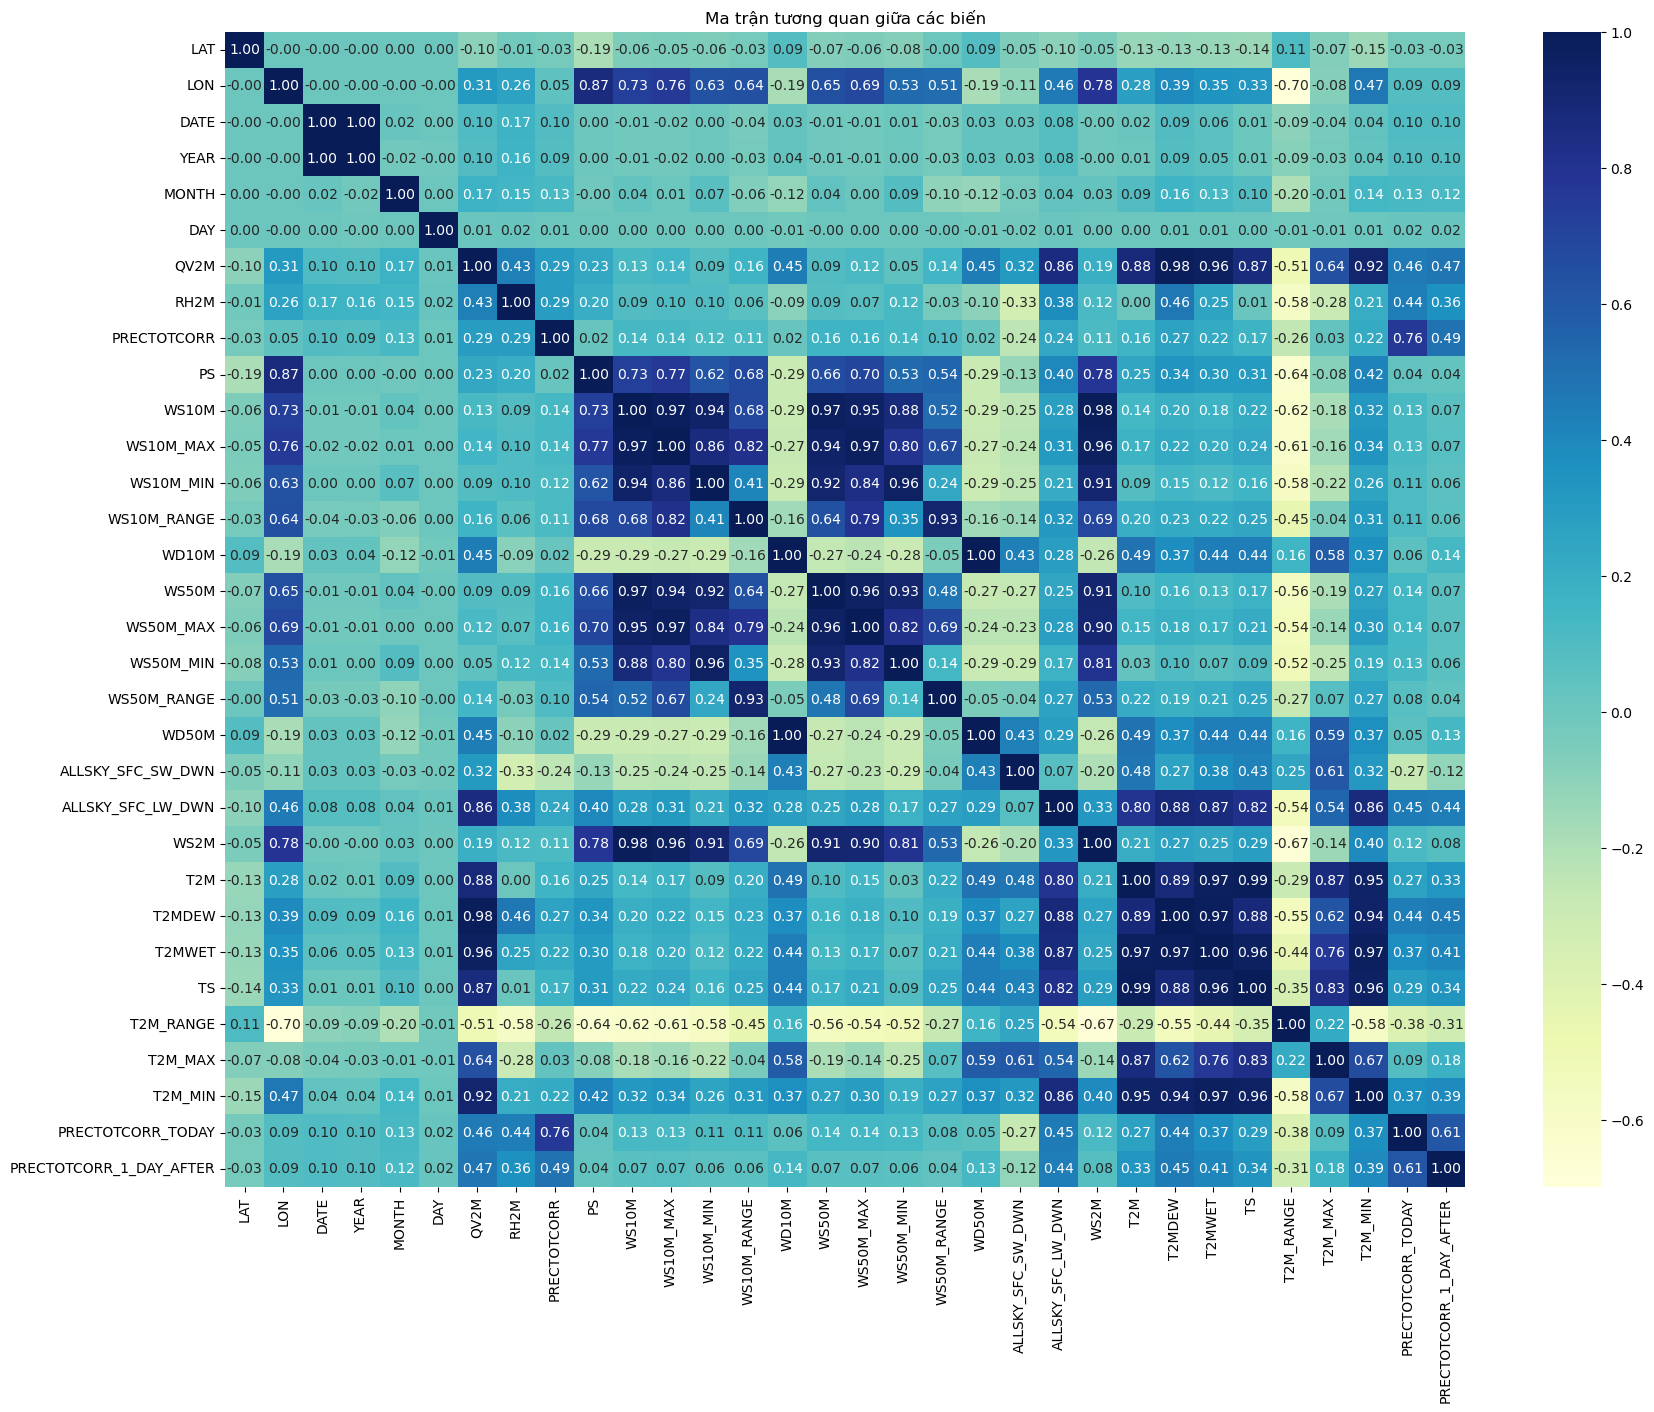

In [17]:
# Tính ma trận tương quan
correlation_matrix = all_data_cleaned.corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Ma trận tương quan giữa các biến')
plt.show()


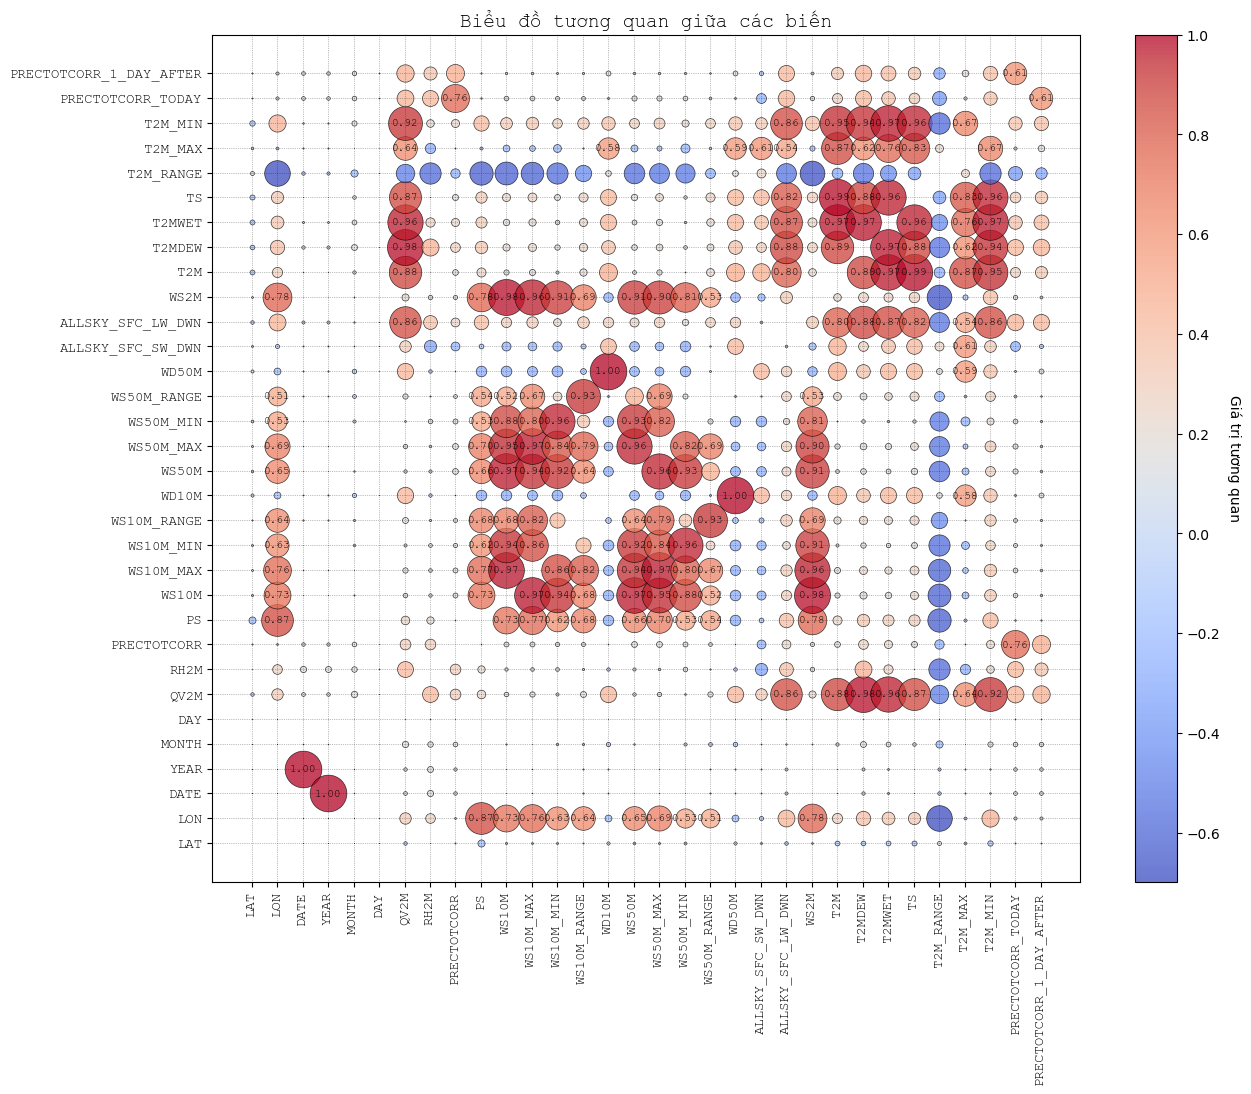

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

# Tính ma trận tương quan
correlation_matrix = all_data_cleaned.corr()

# Lấy tên các biến
variables = correlation_matrix.columns

# Tạo biểu đồ tương quan dạng bubble
plt.figure(figsize=(14, 11))

# Chuẩn hóa giá trị tương quan để tạo gradient màu sắc
norm = Normalize(vmin=correlation_matrix.min().min(), vmax=correlation_matrix.max().max())

for i in range(len(variables)):
    for j in range(len(variables)):
        if i != j:
            size = correlation_matrix.iloc[i, j] ** 2 * 700
            # Sử dụng màu gradient dựa trên giá trị tương quan và colormap 'coolwarm'
            plt.scatter(i, j, s=size, alpha=0.75, c=[[correlation_matrix.iloc[i, j]]], cmap='coolwarm', edgecolors="black", linewidth=0.5, norm=norm)
            if correlation_matrix.iloc[i, j] > 0.5:
                plt.text(i, j, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', fontsize=8, fontdict={'fontname': 'Courier New'})

# Thêm đường kẽ ngang và dọc với đường kẻ mờ
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='black', alpha=0.5)

# Điều chỉnh các tham số để hiển thị bubble chart
plt.xticks(range(len(variables)), variables, rotation=90, fontsize=10, fontname='Courier New')
plt.yticks(range(len(variables)), variables, rotation=0, fontsize=10, fontname='Courier New')
plt.title('Biểu đồ tương quan giữa các biến', fontdict={'fontname': 'Courier New', 'fontsize': 14})

# Hiển thị colorbar để biểu thị giá trị tương quan
cbar = plt.colorbar()
cbar.set_label('Giá trị tương quan', rotation=270, labelpad=15)

plt.show()
